In [38]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import os
import warnings

from sklearn.linear_model import LinearRegression

warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/indonesian-salary-by-region-19972022/Indonesian Salary by Region (1997-2025).csv


In [39]:
salary_id = pd.read_csv("/kaggle/input/indonesian-salary-by-region-19972022/Indonesian Salary by Region (1997-2025).csv")

In [40]:
print(salary_id.columns)

Index(['REGION', 'SALARY', 'YEAR'], dtype='object')


In [41]:
print(salary_id.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   REGION  983 non-null    object 
 1   SALARY  983 non-null    float64
 2   YEAR    983 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.2+ KB
None


In [42]:
print(salary_id.isna().sum().sum())

0


In [43]:
summary_many_UMR_in_year_by_Region = (
    salary_id[salary_id['YEAR'] >= 1997]
    .sort_values('YEAR')
    .groupby('YEAR')
    .size()
    .reset_index(name='REGION')
)

In [44]:
print(summary_many_UMR_in_year_by_Region)

    YEAR  REGION
0   1997      28
1   1998      32
2   1999      32
3   2000      32
4   2001      32
5   2002      32
6   2003      32
7   2004      32
8   2005      32
9   2006      34
10  2007      34
11  2008      34
12  2009      34
13  2010      34
14  2011      34
15  2012      34
16  2013      34
17  2014      34
18  2015      35
19  2016      35
20  2017      35
21  2018      35
22  2019      35
23  2020      35
24  2021      35
25  2022      35
26  2023      35
27  2024      39
28  2025      39


In [45]:
summary_UMR_by_Region_1997_to_2022 = (
    salary_id
    .groupby('REGION')
    .agg(
        Rata_rata_Gaji=('SALARY', 'mean'),
        Gaji_Terendah=('SALARY', 'min'),
        Gaji_Tertinggi=('SALARY', 'max')
    )
    .reset_index()
    .sort_values('REGION')
)

In [46]:
print(summary_UMR_by_Region_1997_to_2022)

                  REGION  Rata_rata_Gaji  Gaji_Terendah  Gaji_Tertinggi
0                   ACEH    1.598199e+06       128000.0       3685615.0
1                   BALI    1.257340e+06       141500.0       2996560.0
2                 BANTEN    1.316088e+06       176800.0       2905119.0
3               BENGKULU    1.159160e+06       127500.0       2888564.0
4          DI YOGYAKARTA    9.271658e+05       106500.0       2264080.0
5            DKI JAKARTA    2.121272e+06       172500.0       5396760.0
6              GORONTALO    1.335027e+06       135500.0       3221731.0
7              INDONESIA    1.353550e+06       135000.0       3315728.0
8                  JAMBI    1.348895e+06       119500.0       3234533.0
9             JAWA BARAT    9.718615e+05       172500.0       2250000.0
10           JAWA TENGAH    8.946493e+05       113000.0       2169348.0
11            JAWA TIMUR    9.128206e+05       132500.0       2305984.0
12      KALIMANTAN BARAT    1.199798e+06       126500.0       28

In [47]:
def summary_by_island(df, region_list, start_year=2017):
    summary = (
        df[(df['REGION'].isin(region_list)) & (df['YEAR'] >= start_year)]
        .groupby('REGION')
        .agg(
            Rata_rata_Gaji=('SALARY', 'mean'),
            Gaji_Terendah=('SALARY', 'min'),
            Gaji_Tertinggi=('SALARY', 'max'),
            Jumlah_Besaran_Gaji_Tiap_Tahun=('SALARY', 'count')
        )
        .reset_index()
        .sort_values('REGION')
    )
    return summary

In [48]:
java_regions = ["DKI JAKARTA", "BANTEN", "JAWA BARAT", "JAWA TENGAH", "DI YOGYAKARTA", "JAWA TIMUR"]
summary_java = summary_by_island(salary_id, java_regions)

In [49]:
sumatera_regions = ["ACEH", "SUMATERA UTARA", "SUMATERA BARAT", "RIAU", "KEP. RIAU", "JAMBI",
                    "BENGKULU", "SUMATERA SELATAN", "KEP. BANGKA BELITUNG", "LAMPUNG"]
summary_sumatera = summary_by_island(salary_id, sumatera_regions)

In [50]:
kalimantan_regions = ["KALIMANTAN BARAT", "KALIMANTAN UTARA", "KALIMANTAN TIMUR",
                      "KALIMANTAN SELATAN","KALIMANTAN TENGAH"]
summary_kalimantan = summary_by_island(salary_id, kalimantan_regions)

In [51]:
sulawesi_regions = ["SULAWESI BARAT", "SULAWESI UTARA", "SULAWESI TENGGARA",
                    "SULAWESI SELATAN","SULAWESI TENGAH", "GORONTALO"]
summary_sulawesi = summary_by_island(salary_id, sulawesi_regions)

In [52]:
sunda_kecil_regions = ["BALI", "NUSA TENGGARA BARAT", "NUSA TENGGARA TIMUR"]
summary_sunda_kecil = summary_by_island(salary_id, sunda_kecil_regions)

In [53]:
maluku_regions = ["MALUKU", "MALUKU UTARA"]
summary_maluku = summary_by_island(salary_id, maluku_regions)

In [54]:
papua_regions = ["PAPUA", "PAPUA BARAT"]
summary_papua = summary_by_island(salary_id, papua_regions)

In [55]:
def plot_UMR_trend_by_region(df, region_list, title):
    plt.figure(figsize=(10,6))
    subset = df[(df['REGION'].isin(region_list)) & (df['YEAR'] >= 2017)]
    sns.lineplot(data=subset, x='YEAR', y='SALARY', hue='REGION', marker='o')
    plt.title(title)
    plt.xticks(subset['YEAR'].unique())  # pastikan semua tahun muncul di sumbu X
    plt.ylabel("UMR (IDR)")
    plt.xlabel("Tahun")
    plt.legend(title='Provinsi', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
def plot_UMR_by_region(summary_df, title):
    plt.figure(figsize=(10,6))
    sns.barplot(data=summary_df, x='REGION', y='Rata_rata_Gaji', palette='Set2')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("UMR (IDR)")
    plt.xlabel("Provinsi")
    plt.tight_layout()
    plt.show()

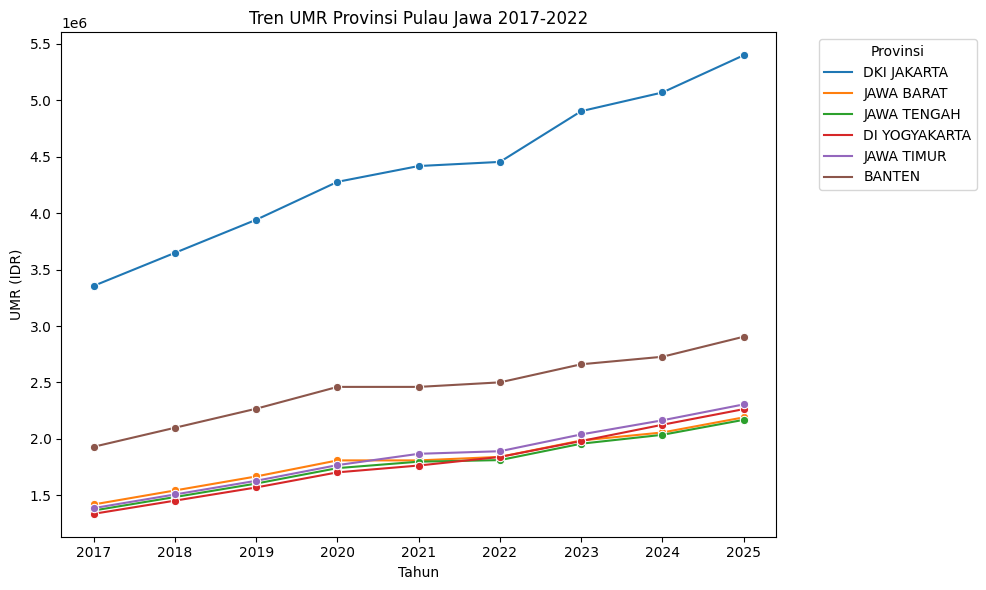

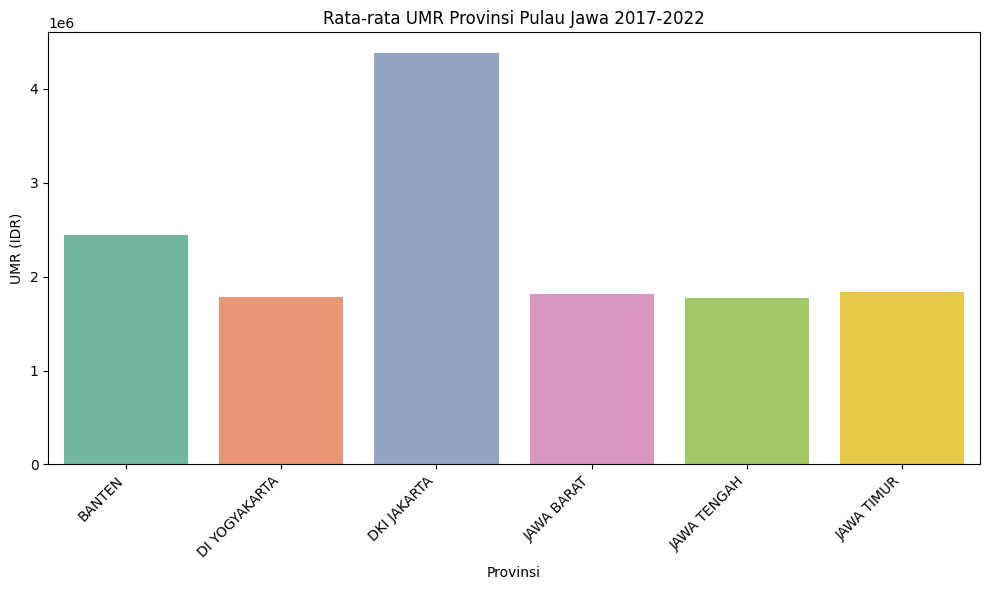

In [56]:
plot_UMR_trend_by_region(salary_id, java_regions, "Tren UMR Provinsi Pulau Jawa 2017-2022")
plot_UMR_by_region(summary_java, "Rata-rata UMR Provinsi Pulau Jawa 2017-2022")

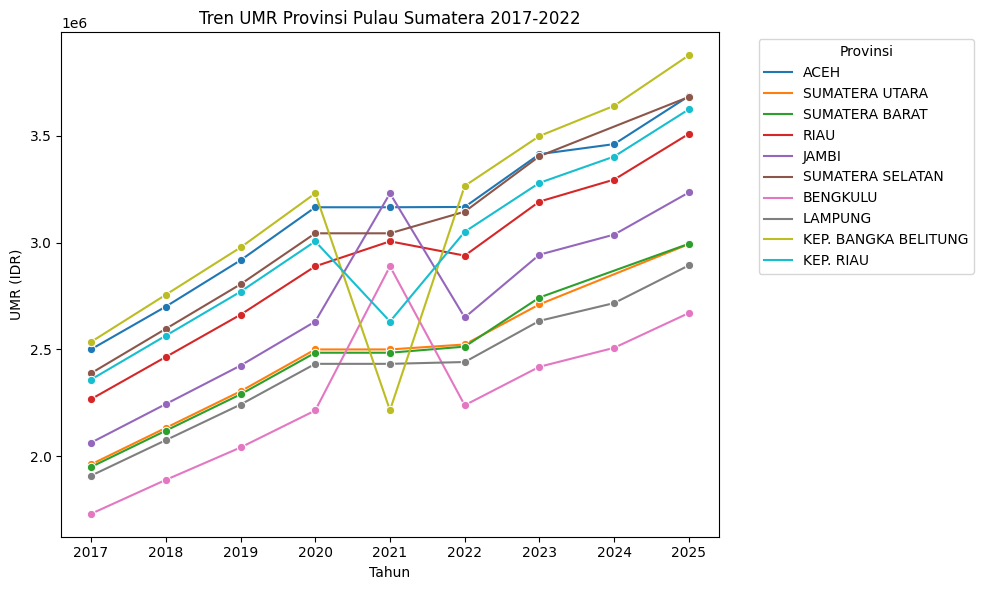

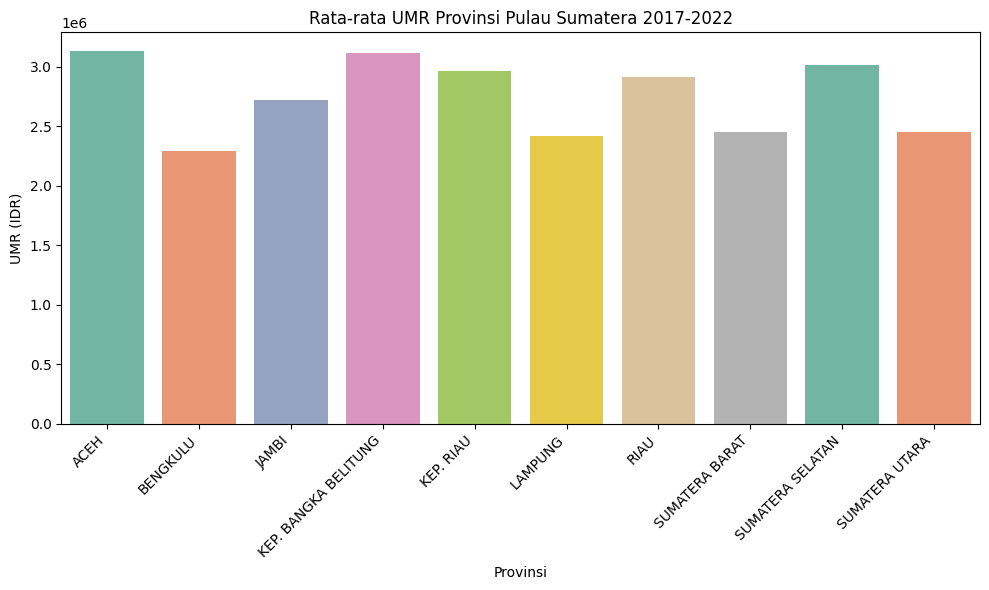

In [57]:
plot_UMR_trend_by_region(salary_id, sumatera_regions, "Tren UMR Provinsi Pulau Sumatera 2017-2022")
plot_UMR_by_region(summary_sumatera, "Rata-rata UMR Provinsi Pulau Sumatera 2017-2022")

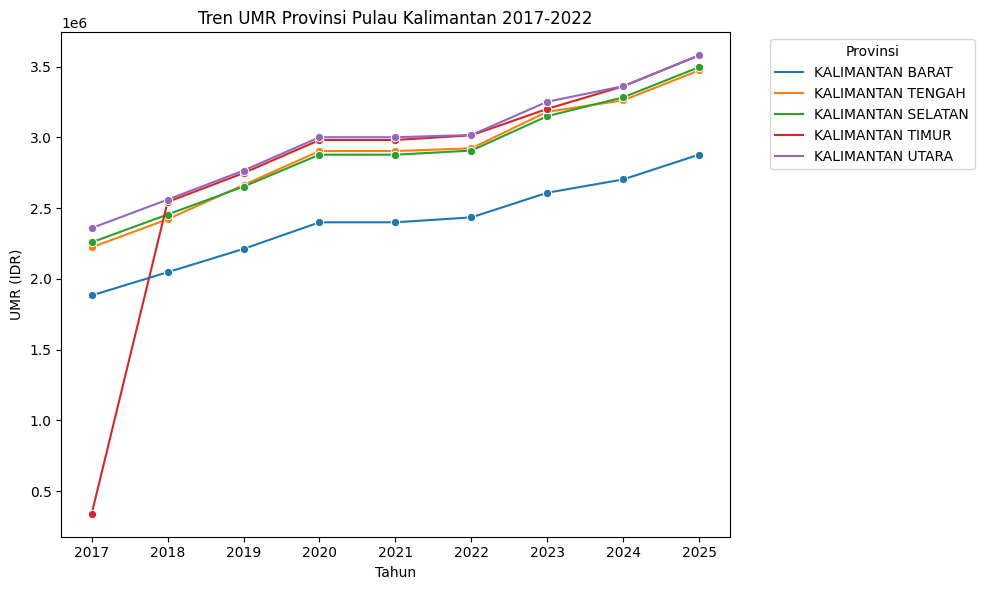

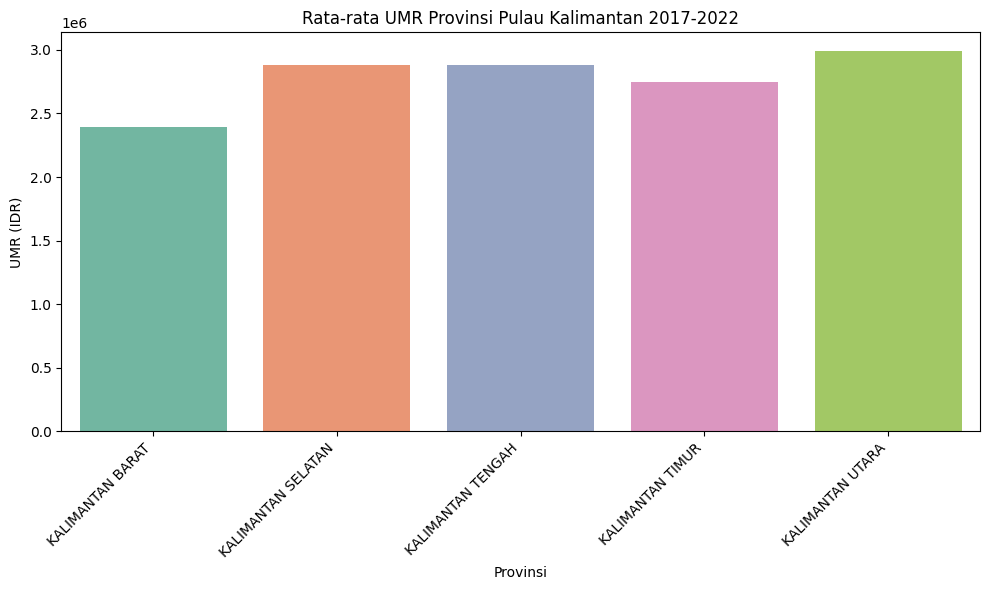

In [58]:
plot_UMR_trend_by_region(salary_id, kalimantan_regions, "Tren UMR Provinsi Pulau Kalimantan 2017-2022")
plot_UMR_by_region(summary_kalimantan, "Rata-rata UMR Provinsi Pulau Kalimantan 2017-2022")

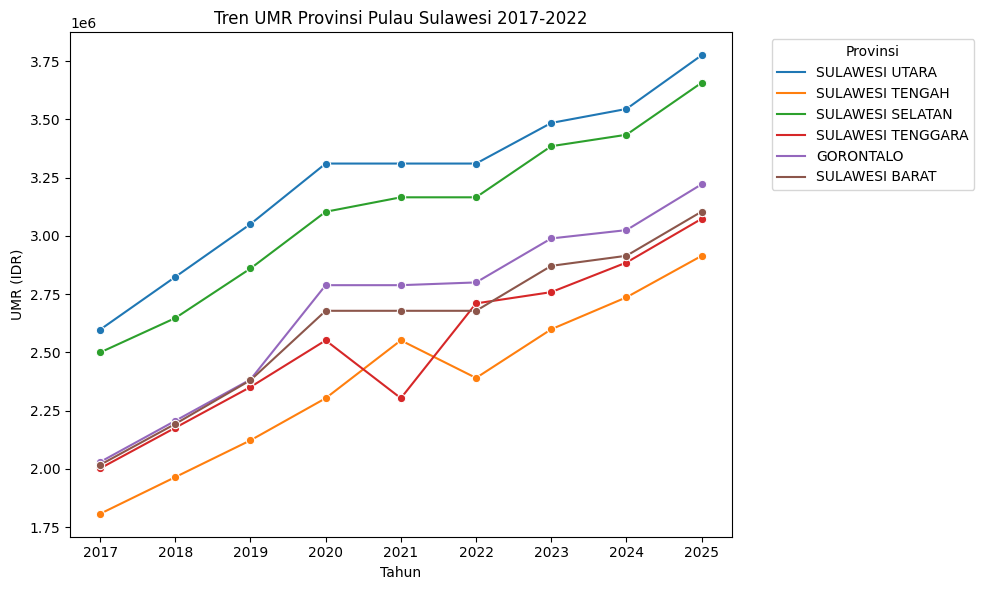

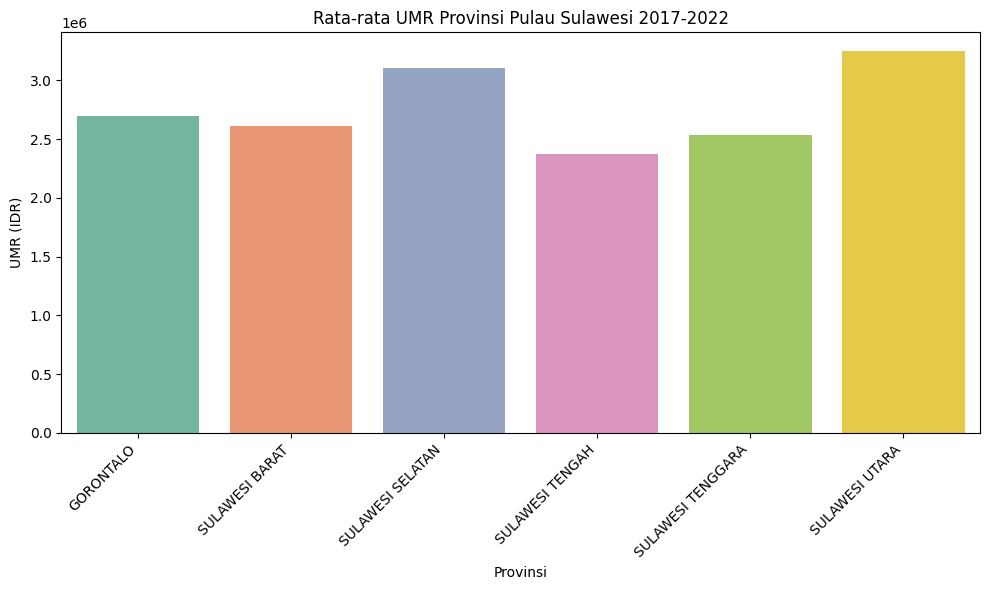

In [59]:
plot_UMR_trend_by_region(salary_id, sulawesi_regions, "Tren UMR Provinsi Pulau Sulawesi 2017-2022")
plot_UMR_by_region(summary_sulawesi, "Rata-rata UMR Provinsi Pulau Sulawesi 2017-2022")

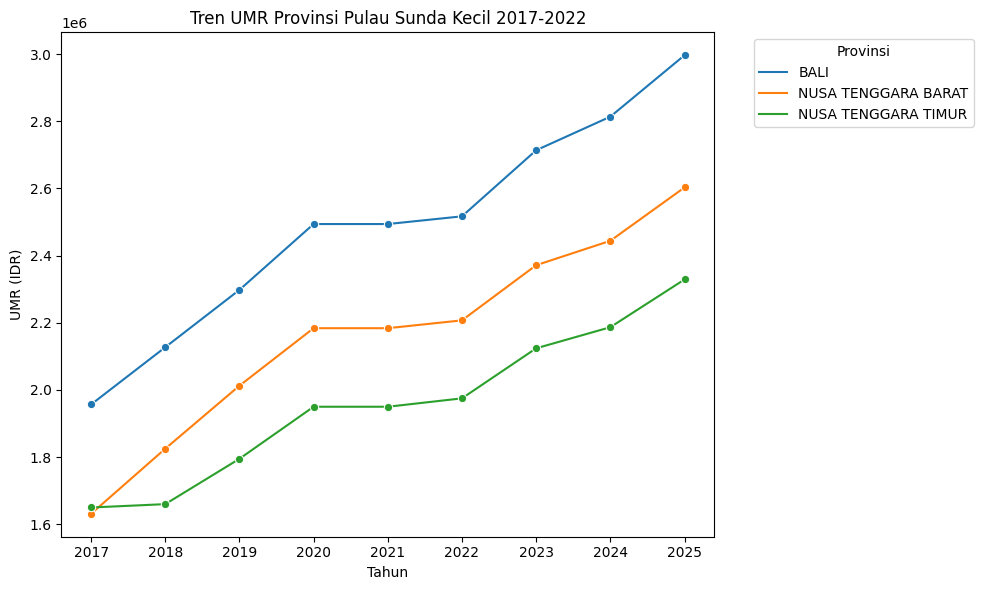

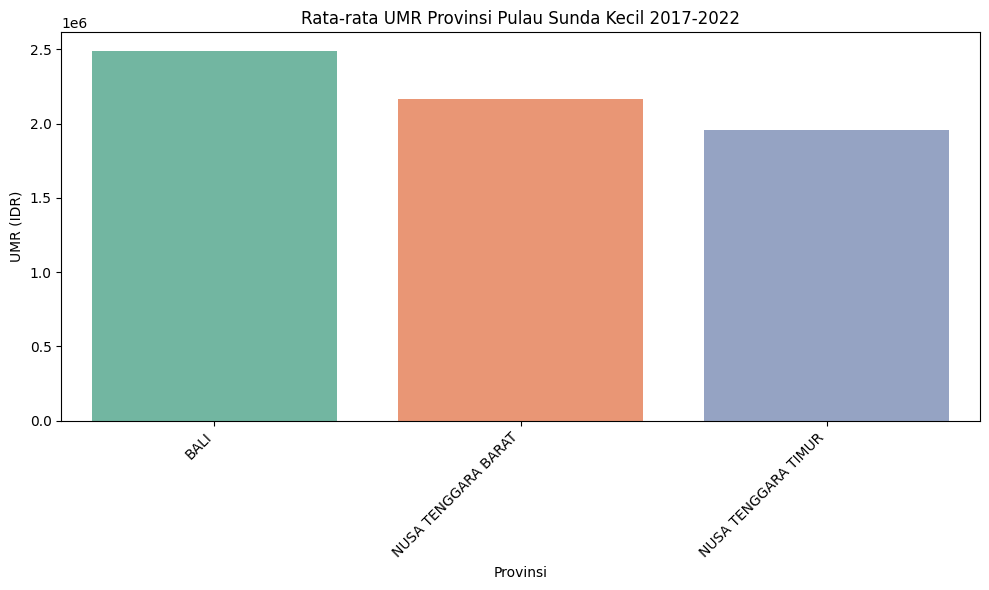

In [60]:
plot_UMR_trend_by_region(salary_id, sunda_kecil_regions, "Tren UMR Provinsi Pulau Sunda Kecil 2017-2022")
plot_UMR_by_region(summary_sunda_kecil, "Rata-rata UMR Provinsi Pulau Sunda Kecil 2017-2022")

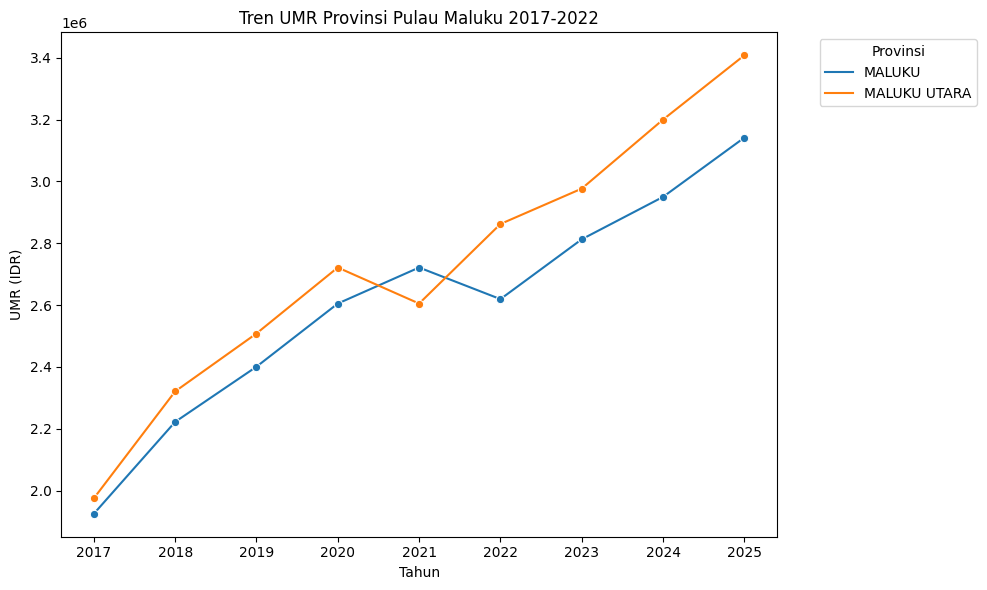

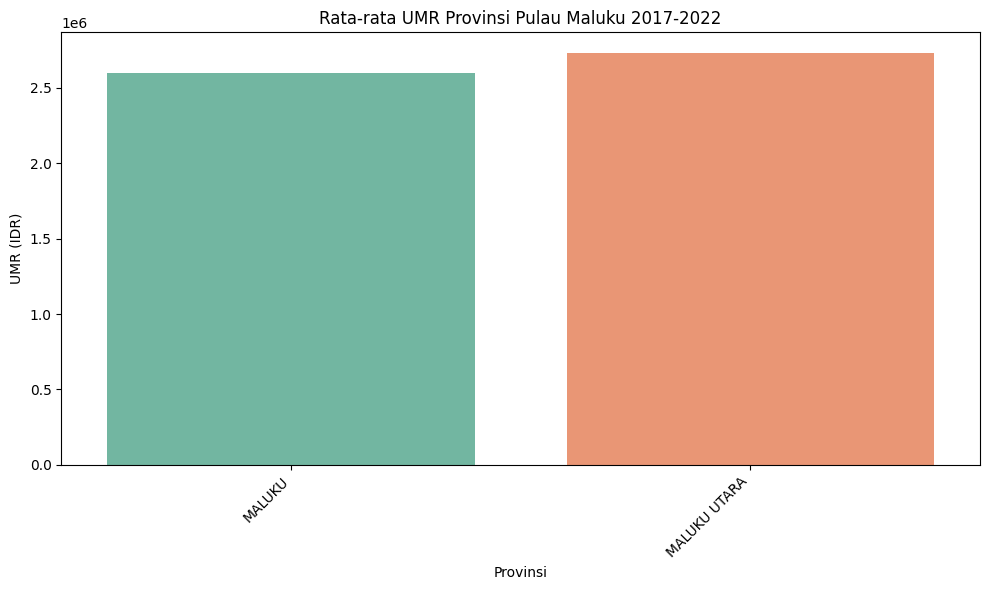

In [61]:
plot_UMR_trend_by_region(salary_id, maluku_regions, "Tren UMR Provinsi Pulau Maluku 2017-2022")
plot_UMR_by_region(summary_maluku, "Rata-rata UMR Provinsi Pulau Maluku 2017-2022")

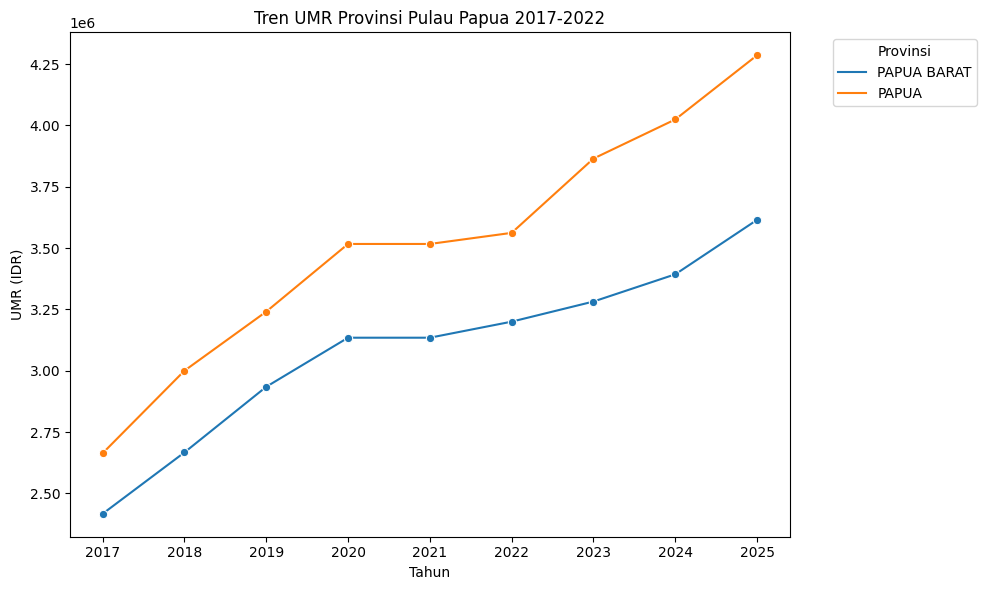

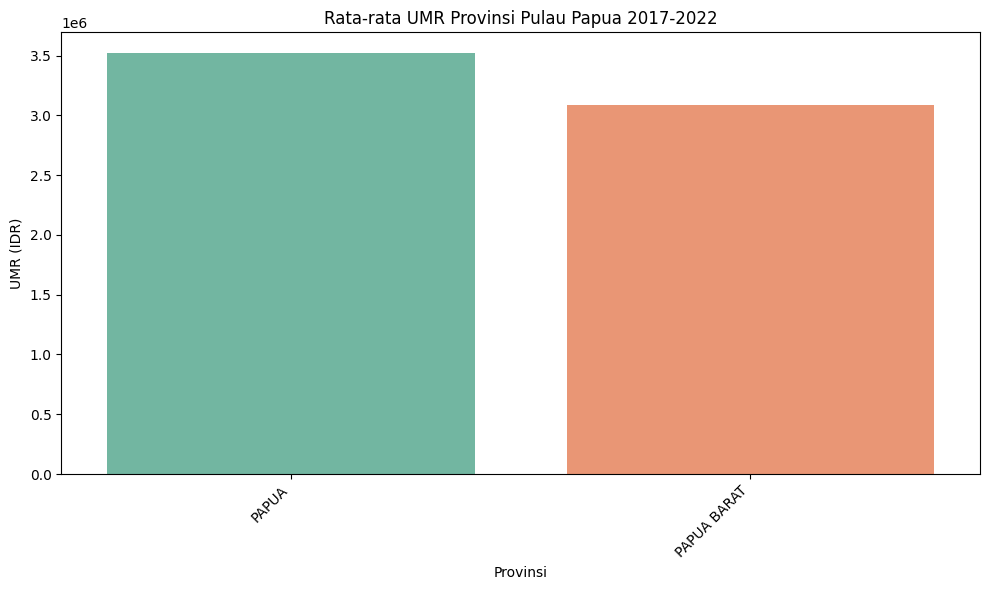

In [62]:
plot_UMR_trend_by_region(salary_id, papua_regions, "Tren UMR Provinsi Pulau Papua 2017-2022")
plot_UMR_by_region(summary_papua, "Rata-rata UMR Provinsi Pulau Papua 2017-2022")

In [63]:
avg = salary_id.groupby("YEAR")["SALARY"].mean().reset_index()

growth = [0]
for i in range(1, len(avg)):
    growth.append(avg["SALARY"][i] - avg["SALARY"][i-1])

avg["growth"] = growth

print(avg.head())

   YEAR         SALARY        growth
0  1997  134964.285714      0.000000
1  1998  150937.500000  15973.214286
2  1999  175390.625000  24453.125000
3  2000  216506.250000  41115.625000
4  2001  290487.500000  73981.250000


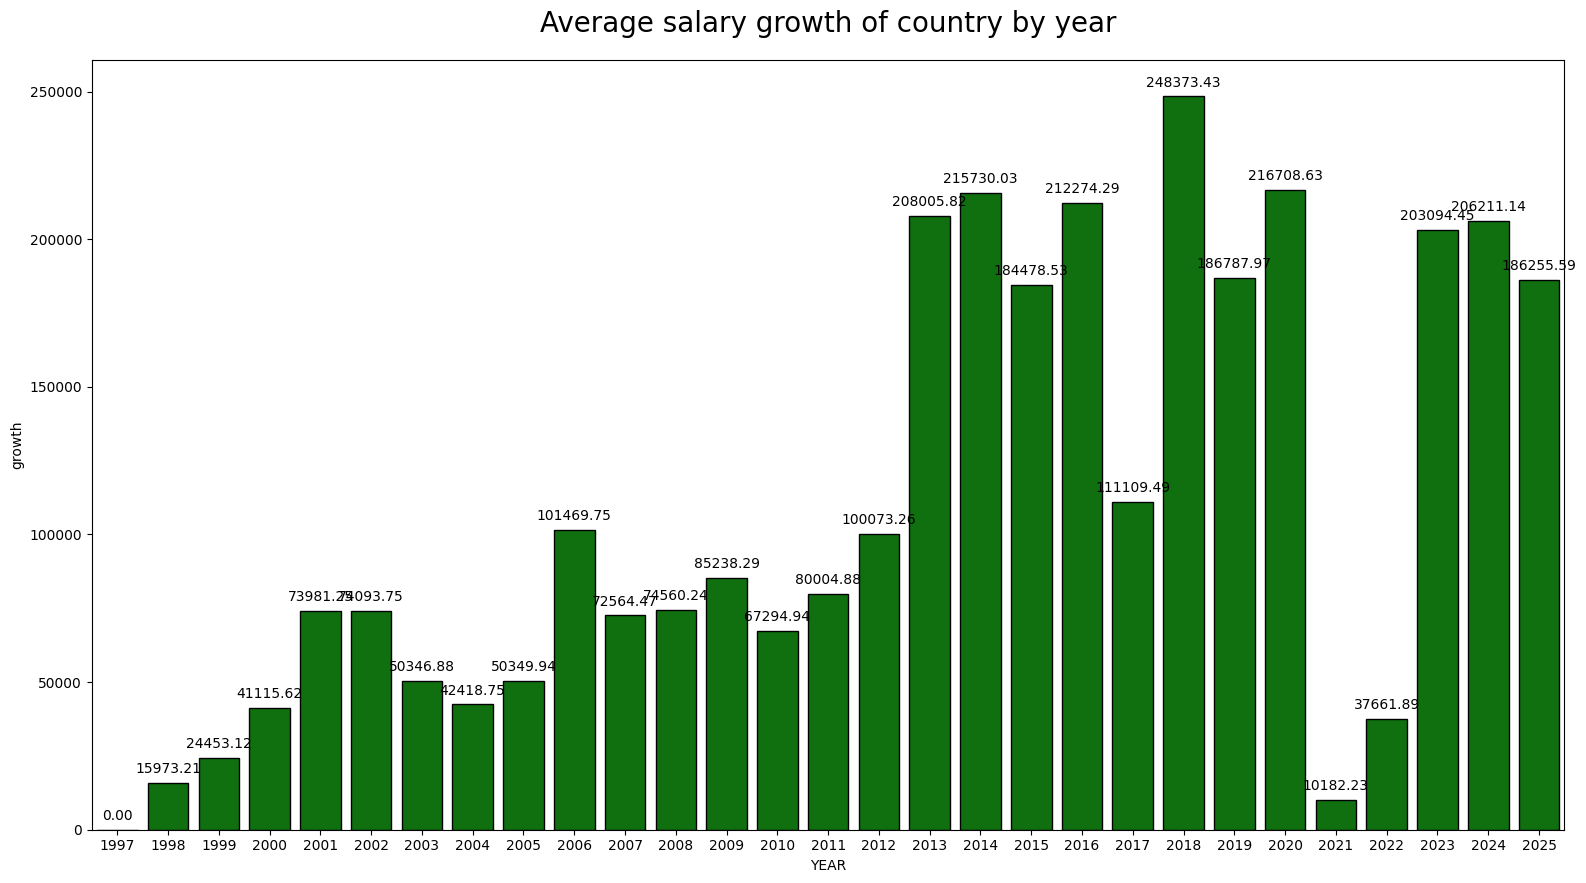

In [64]:
plt.figure(figsize=(19,10))
ax = sns.barplot(x='YEAR', y='growth', data=avg, color='green', edgecolor="black")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0,10), textcoords='offset points')
plt.title("Average salary growth of country by year", size=20, pad=20)
plt.show()

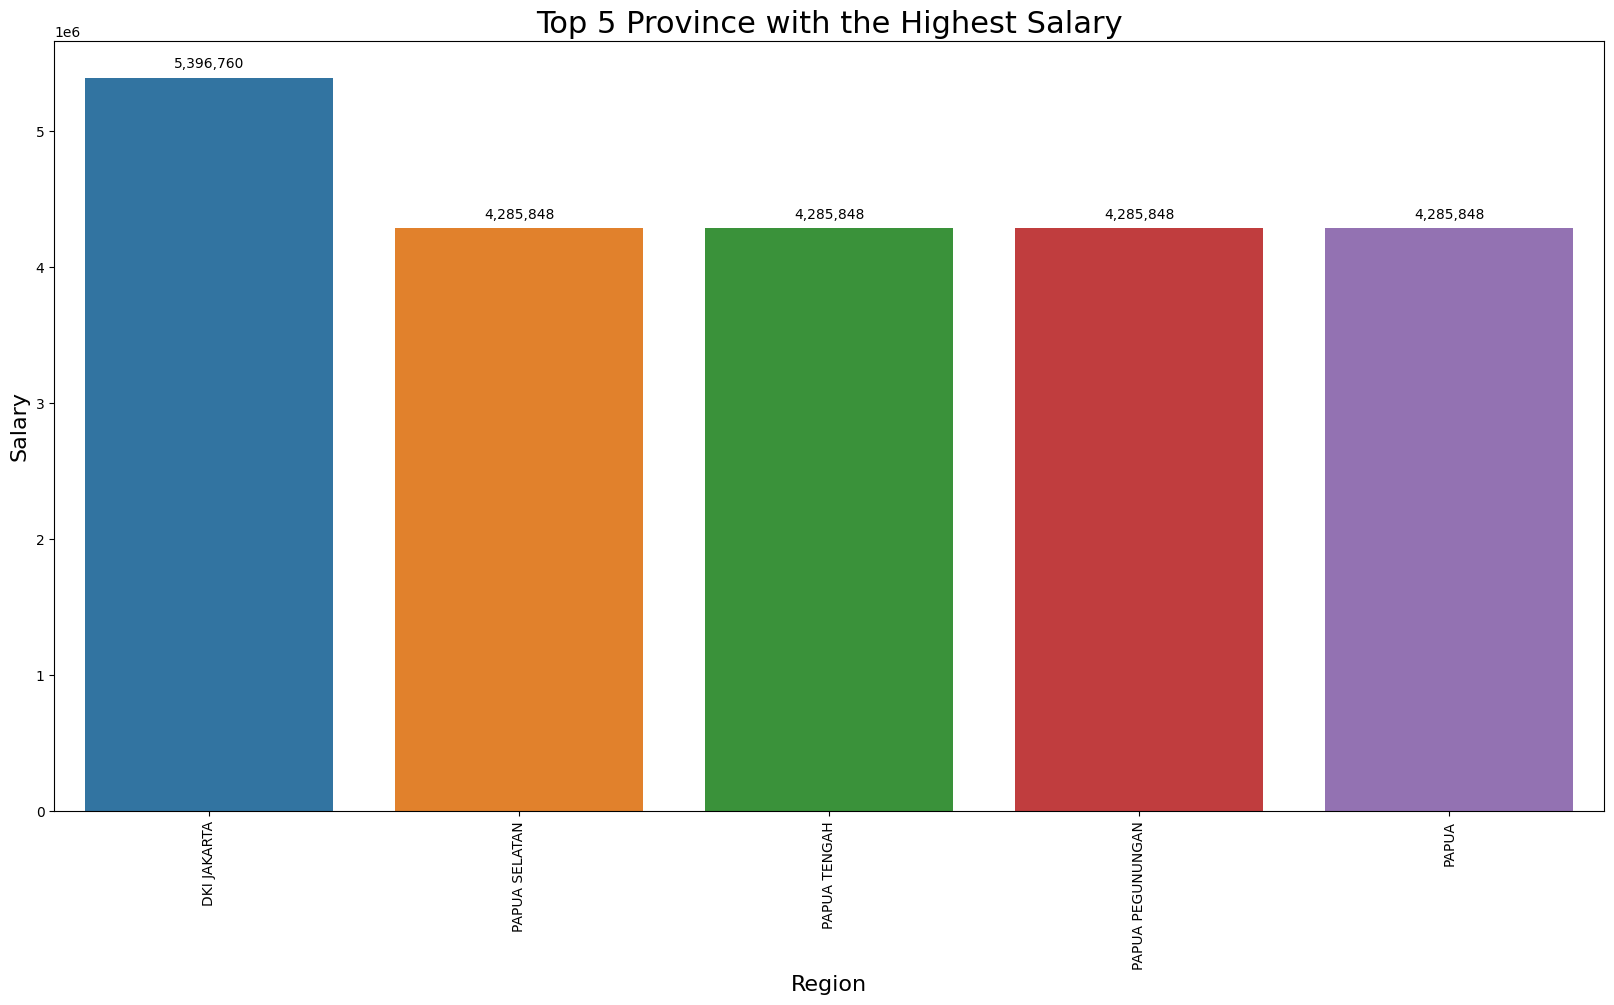

In [65]:
top_5_regions = salary_id.groupby('REGION')['SALARY'].max().sort_values(ascending=False)[:5].reset_index()

plt.figure(figsize = (20, 10))
graph = sns.barplot(x='REGION', y='SALARY', data=top_5_regions, order=top_5_regions['REGION'])
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
plt.xlabel('Region', fontsize=16)
plt.ylabel('Salary', fontsize=16)
plt.title('Top 5 Province with the Highest Salary', fontsize=22)

for index, row in top_5_regions.iterrows():
    graph.annotate(format(int(row['SALARY']), ','),
                   (row.name, row['SALARY']),
                   ha='center', va='center',
                   xytext=(0,10),
                   textcoords='offset points')

In [66]:
salary_id_sorted = salary_id.reset_index(drop=True).groupby('REGION').apply(lambda x: x.sort_values('YEAR'))

In [67]:
models = {}
for provinsi in salary_id_sorted['REGION'].unique():
    X = salary_id_sorted.loc[salary_id_sorted['REGION'] == provinsi, 'YEAR'].values.reshape(-1, 1)
    y = salary_id_sorted.loc[salary_id_sorted['REGION'] == provinsi, 'SALARY'].values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    models[provinsi] = model

In [68]:
future_years = np.array(range(salary_id_sorted['YEAR'].max() + 1, salary_id_sorted['YEAR'].max() + 11))
future_ump = []
for provinsi in salary_id_sorted['REGION'].unique():
    model = models[provinsi]
    future_ump_provinsi = model.predict(future_years.reshape(-1, 1))
    future_ump.extend(future_ump_provinsi)

In [69]:
future_df = pd.DataFrame({
    'REGION': np.repeat(salary_id_sorted['REGION'].unique(), 10),
    'YEAR': np.tile(range(salary_id_sorted['YEAR'].max() + 1, salary_id_sorted['YEAR'].max() + 11), salary_id_sorted['REGION'].nunique()),
    'SALARY': future_ump
})
future_df['SALARY'] = future_df['SALARY'].astype(int)

In [70]:
combined_df = pd.concat([salary_id_sorted, future_df], axis=0, ignore_index=True)

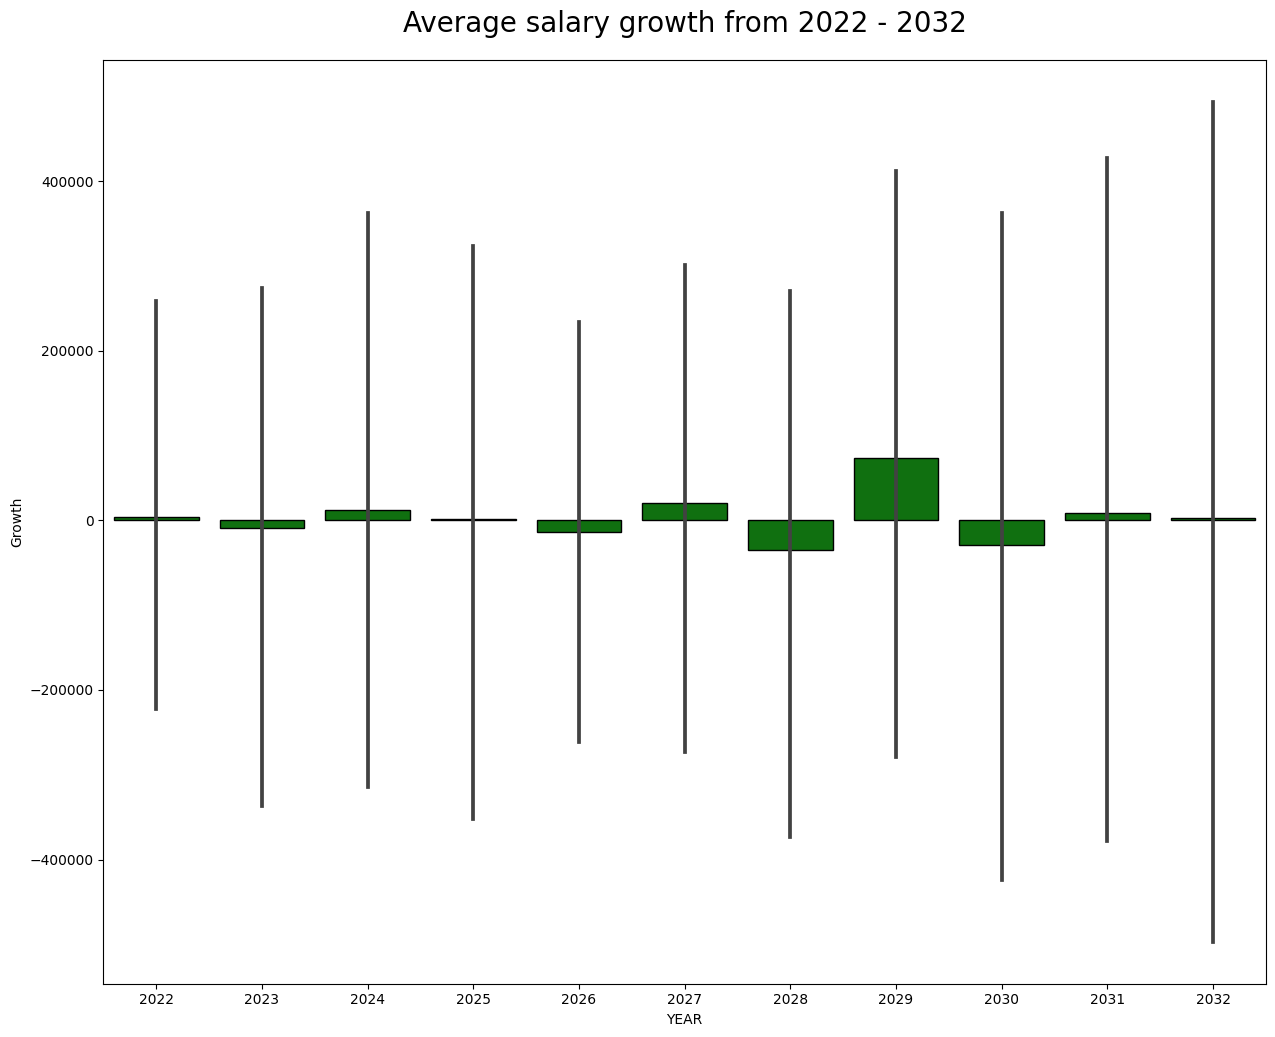

In [71]:
AVG = combined_df.sort_values(by='YEAR', ascending=True)
AVG['Growth'] = [0] + [AVG['SALARY'].iloc[i] - AVG['SALARY'].iloc[i-1] for i in range(1, len(AVG))]

AVG_filtered = AVG.query('YEAR >= 2022 and YEAR <= 2032')

plt.figure(figsize=(15,12))
plt.title("Average salary growth from 2022 - 2032", size=20, pad=20)

ax = sns.barplot(x='YEAR', y='Growth', data=AVG_filtered, color='green', edgecolor="black")

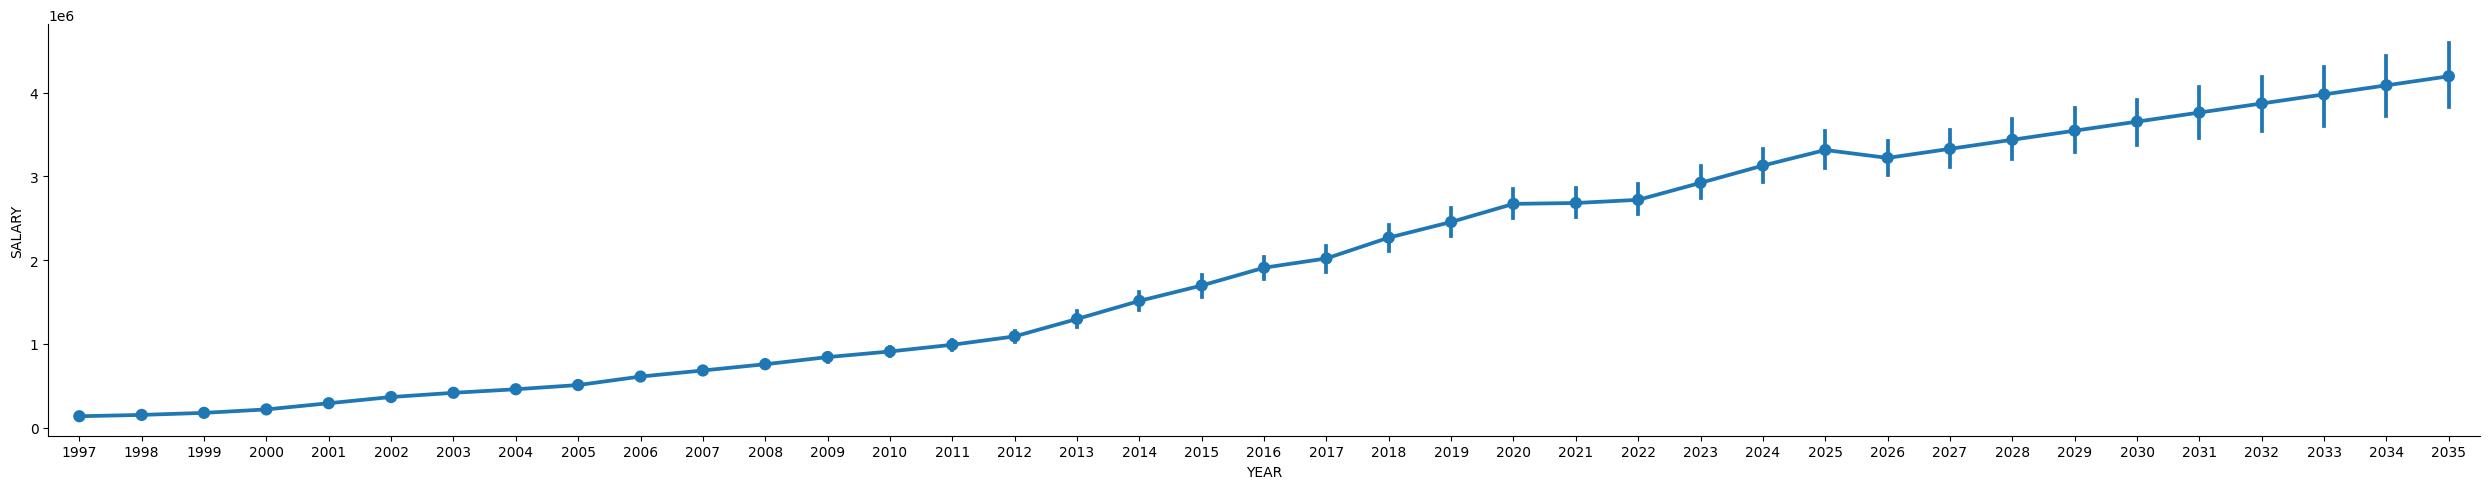

In [72]:
sns.catplot(x='YEAR', y='SALARY', data=combined_df, kind='point', aspect=5)

In [73]:
fig = px.bar(combined_df, x='REGION', y="SALARY", color="REGION",
             animation_frame="YEAR", range_y=[0,7000000])
fig.show()

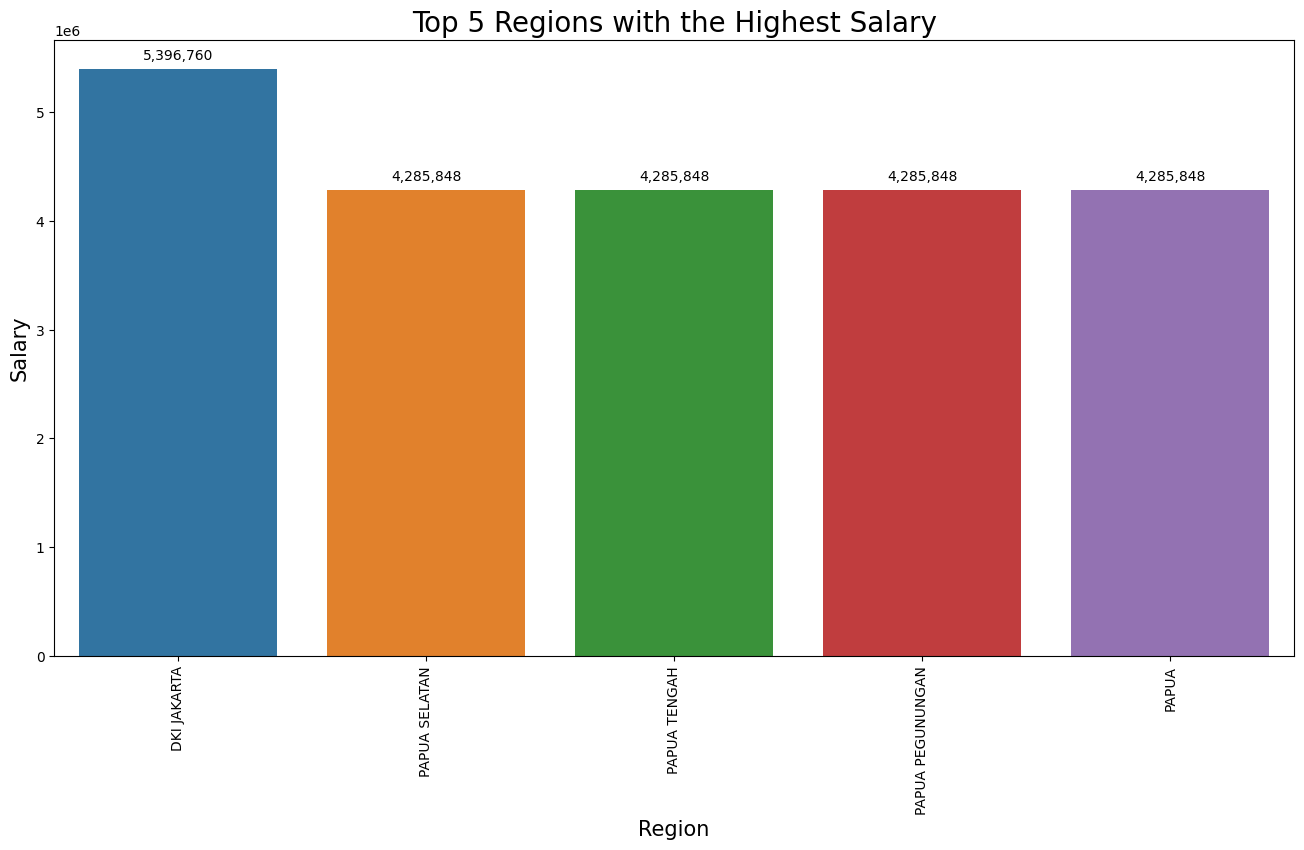

In [74]:
salary_id_sorted = salary_id.groupby('REGION').apply(lambda x: x.sort_values('YEAR')).reset_index(drop=True)

top_5_regions = salary_id_sorted.groupby('REGION')['SALARY'].max().sort_values(ascending=False)[:5].reset_index()

plt.figure(figsize=(16,8))
graph = sns.barplot(x='REGION', y='SALARY', data=top_5_regions, order=top_5_regions['REGION'])
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.title('Top 5 Regions with the Highest Salary', fontsize=20)

for index, row in top_5_regions.iterrows():
    graph.annotate(format(int(row['SALARY']), ','),
                   (row.name, row['SALARY']),
                   ha='center', va='center',
                   xytext=(0,10),
                   textcoords='offset points')

plt.show()